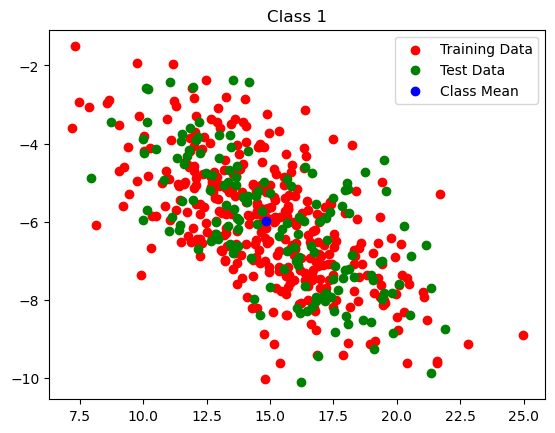

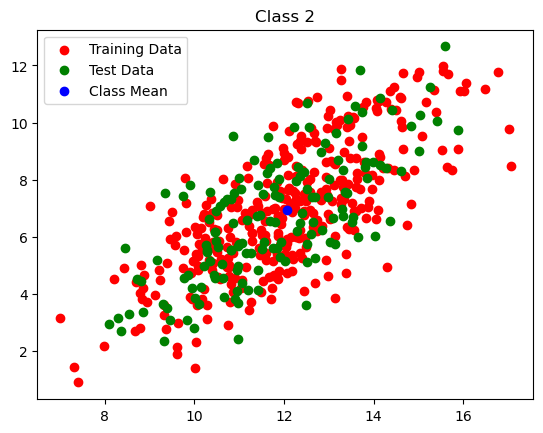

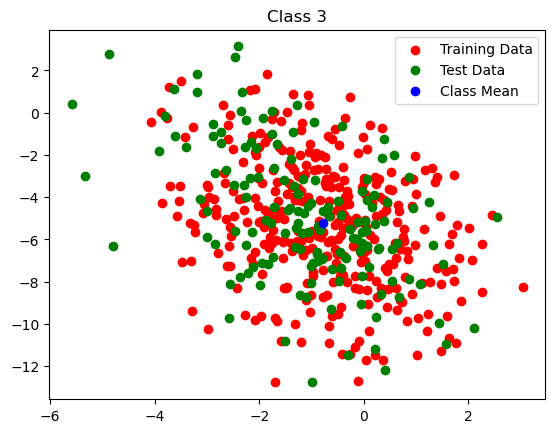

In [9]:
import os
from turtle import color
import matplotlib.pyplot as plt
from pyparsing import col 

from webcolors import CSS21_NAMES_TO_HEX

def extract_data_from_txt(file_path):
    array = []
    with open(file_path, 'r') as f:
        for line in f:
            array.append([float(value) for value in line.split()])
    return array

def mean(feature):
    one, two = 0, 0
    for row in feature:
        one += row[0]
        two += row[1]
    one /= len(feature)
    two /= len(feature)
    return [one, two]


c1f = extract_data_from_txt("./Group18/LS_Group18/Class1.txt")
c2f = extract_data_from_txt("./Group18/LS_Group18/Class2.txt")
c3f = extract_data_from_txt("./Group18/LS_Group18/Class3.txt")


c1T = c1f[:350]
c1t = c1f[350:]
c2T = c2f[:350]
c2t = c2f[350:]
c3T = c3f[:350]
c3t = c3f[350:]

c1m = mean(c1T)
c2m = mean(c2T)
c3m = mean(c3T)

def plot_class_feature(T, t, mean, title):
    plt.figure()
    plt.scatter([row[0] for row in T], [row[1] for row in T], label='Training Data', color='red')
    plt.scatter([row[0] for row in t], [row[1] for row in t], label='Test Data', color='green')
    plt.scatter(mean[0], mean[1], label='Class Mean', color='blue')
    plt.title(title)
    plt.legend()
    plt.show()

plot_class_feature(c1T, c1t, c1m, 'Class 1')
plot_class_feature(c2T, c2t, c2m, 'Class 2')
plot_class_feature(c3T, c3t, c3m, 'Class 3')

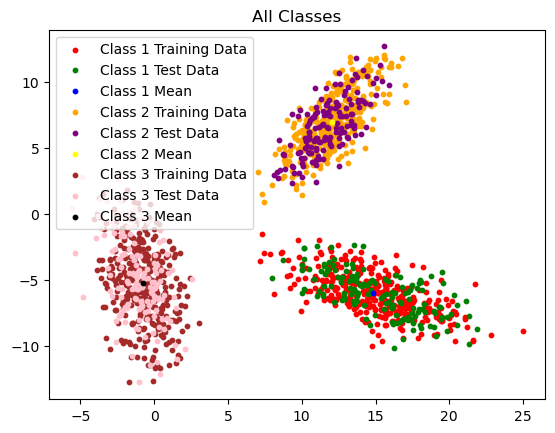

In [10]:
# plot all 3 classes in single graph
def plot_class_feature_all(T1, t1, mean1, T2, t2, mean2, T3, t3, mean3, title):
    plt.figure()
    plt.scatter([row[0] for row in T1], [row[1] for row in T1], label='Class 1 Training Data', color='red', s=10)
    plt.scatter([row[0] for row in t1], [row[1] for row in t1], label='Class 1 Test Data', color='green', s=10)
    plt.scatter(mean1[0], mean1[1], label='Class 1 Mean', color='blue', s=10)
    plt.scatter([row[0] for row in T2], [row[1] for row in T2], label='Class 2 Training Data', color='orange', s=10)
    plt.scatter([row[0] for row in t2], [row[1] for row in t2], label='Class 2 Test Data', color='purple', s=10)
    plt.scatter(mean2[0], mean2[1], label='Class 2 Mean', color='yellow', s=10)
    plt.scatter([row[0] for row in T3], [row[1] for row in T3], label='Class 3 Training Data', color='brown', s=10)
    plt.scatter([row[0] for row in t3], [row[1] for row in t3], label='Class 3 Test Data', color='pink', s=10)
    plt.scatter(mean3[0], mean3[1], label='Class 3 Mean', color='black', s=10)
    plt.title(title)
    plt.legend()
    plt.show()

plot_class_feature_all(c1T, c1t, c1m, c2T, c2t, c2m, c3T, c3t, c3m, 'All Classes')

In [11]:
def covariance_matrix(feature, mean):
    cov = [[0, 0], [0, 0]]
    for row in feature:
        cov[0][0] += (row[0] - mean[0]) ** 2
        cov[0][1] += (row[0] - mean[0]) * (row[1] - mean[1])
        cov[1][0] += (row[0] - mean[0]) * (row[1] - mean[1])
        cov[1][1] += (row[1] - mean[1]) ** 2
    cov[0][0] /= len(feature)
    cov[0][1] /= len(feature)
    cov[1][0] /= len(feature)
    cov[1][1] /= len(feature)
    return cov

c1cov = covariance_matrix(c1T, c1m)
c2cov = covariance_matrix(c2T, c2m)
c3cov = covariance_matrix(c3T, c3m)


# case 1
case1cov = [[0, 0], [0, 0]]
case1cov[0][0] = (c1cov[0][0] + c2cov[0][0] + c3cov[0][0]) / 3
case1cov[0][1] = 0
case1cov[1][0] = 0
case1cov[1][1] = (c1cov[1][1] + c2cov[1][1] + c3cov[1][1]) / 3

# case 2
case2cov = [[0, 0], [0, 0]]
case2cov[0][0] = (c1cov[0][0] + c2cov[0][0] + c3cov[0][0]) / 3
case2cov[0][1] = (c1cov[0][1] + c2cov[0][1] + c3cov[0][1]) / 3
case2cov[1][0] = (c1cov[1][0] + c2cov[1][0] + c3cov[1][0]) / 3
case2cov[1][1] = (c1cov[1][1] + c2cov[1][1] + c3cov[1][1]) / 3

# case 3
c1cov_case3 = [[c1cov[0][0], 0], [0, c1cov[1][1]]]
c2cov_case3 = [[c2cov[0][0], 0], [0, c2cov[1][1]]]
c3cov_case3 = [[c3cov[0][0], 0], [0, c3cov[1][1]]]

# case 4
c1cov_case4 = [[c1cov[0][0], c1cov[0][1]], [c1cov[1][0], c1cov[1][1]]]
c2cov_case4 = [[c2cov[0][0], c2cov[0][1]], [c2cov[1][0], c2cov[1][1]]]
c3cov_case4 = [[c3cov[0][0], c3cov[0][1]], [c3cov[1][0], c3cov[1][1]]]